# Fred's Scratchpad

In [14]:
import sys
import os

# Function that configures the notebook kernel by putting the lib directory 
# onto the library path and changing the working directory to the top-level
# project dir. Idempotent.
def setup_kernel():
    # Move to project root if we're not already there
    if os.getcwd().endswith("notebooks"):
        os.chdir("..")
    # TODO: Verify that we're actually at the project root.
    # Add the lib dir to the Python path if it's not already there.
    lib_dir = os.getcwd() + "/lib"
    if lib_dir not in sys.path:
        sys.path.append(lib_dir)

setup_kernel()

In [19]:
import reefer.simulator.domain.reefer_simulator as sim

In [21]:
data_gen = sim.ReeferSimulator()

In [25]:
df = data_gen.generateCo2()
df.head()

,Timestamp,ID,Temperature(celsius),Target_Temperature(celsius),Power,PowerConsumption,ContentType,O2,CO2,Time_Door_Open,Maintenance_Required,Defrost_Cycle
0,2019-09-10 T10:21 Z,101,2.404683,4.4,-3.329163,4.805742,5,20.517831,3.898422,32.240643,0,3
1,2019-09-10 T10:36 Z,101,2.404683,4.4,8.095576,12.901319,5,18.225529,-0.320472,30.761138,1,6
2,2019-09-10 T10:51 Z,101,2.404683,4.4,-3.696057,9.205262,5,19.725974,4.187132,29.806432,1,1
3,2019-09-10 T11:06 Z,101,2.404683,4.4,5.030631,14.235893,5,19.598296,3.169635,33.392766,0,4
4,2019-09-10 T11:21 Z,101,2.404683,4.4,9.286057,23.521950,5,18.375589,3.258133,32.674197,0,5


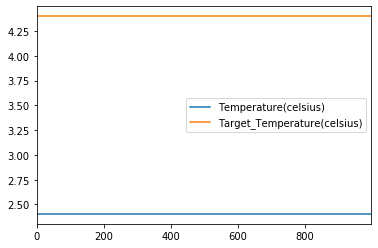

In [38]:
import matplotlib.pyplot as plt

df[['Temperature(celsius)', 'Target_Temperature(celsius)']].plot()

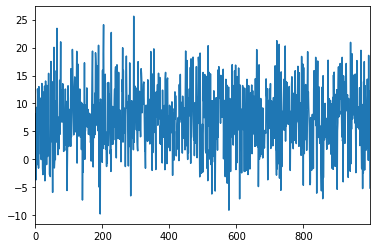

In [49]:
df.Power.plot()

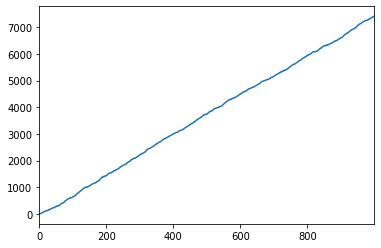

In [40]:
df.PowerConsumption.plot()

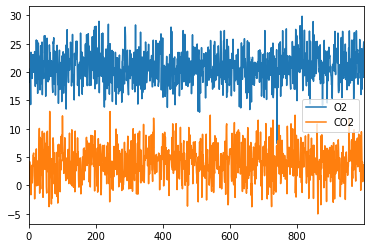

In [44]:
df[["O2", "CO2"]].plot()

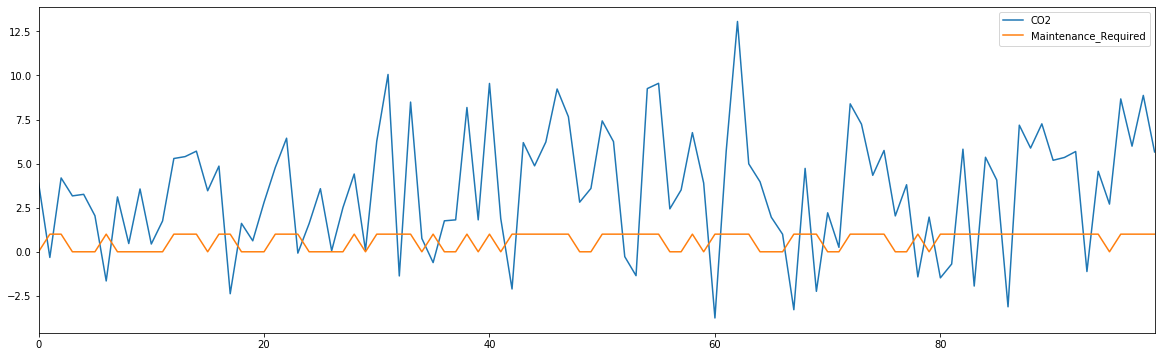

In [57]:

df[["CO2", "Maintenance_Required"]].iloc[:100].plot(figsize=(20, 6))


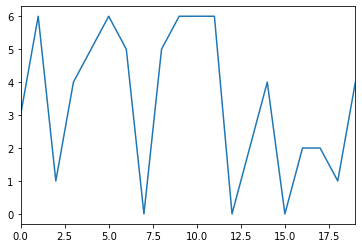

In [59]:
df.Defrost_Cycle.iloc[:20].plot()

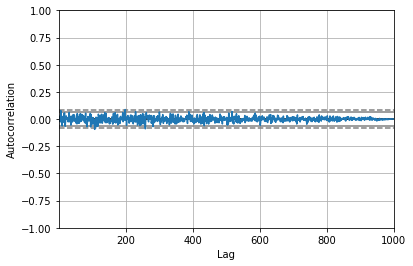

In [63]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.CO2)